In [49]:
import pandas as pd
import json
import ast
import os
import matplotlib
import matplotlib.pyplot as plt 
import datetime
import numpy as np
import calplot

In [47]:
df = pd.DataFrame()
directory = os.fsencode("data")
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if "." in filename:
        continue
    with open("data/" + filename, 'r') as f:
        input = f.read()
        input = input.replace("\n", " ")
        d = ast.literal_eval(input)
        row = pd.json_normalize(d)
        timestamp = int(filename.split("_")[1])
        time = datetime.datetime.fromtimestamp(timestamp)
        row['date'] = time
        row['weekday'] = time.weekday()
        row['hour'] = time.hour + round(time.minute / 30.0) / 2
        df = pd.concat([df, row])

In [3]:
df = df[(df['name'] == "RSF - Weight Rooms")]
df.index = pd.to_datetime(df["date"])
df

,id,created_at,name,screen_type,display_type,dedicated_space_id,list_spaces,list_space_ids,list_space_title,directory_mode,...,dedicated_space.time_zone,dedicated_space.daily_reset,dedicated_space.capacity,dedicated_space.target_capacity,dedicated_space.safe_threshold_mode,dedicated_space.safe_threshold_value,dedicated_space.safe_capacity,date,weekday,hour
date,,,,,,,,,,,,,,,,,,,,,
2023-08-22 15:39:17,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-08-22 15:39:17,1,15.5
2023-08-22 16:00:05,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-08-22 16:00:05,1,16.0
2023-08-22 16:30:06,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-08-22 16:30:06,1,16.5
2023-08-22 17:00:05,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-08-22 17:00:05,1,17.0
2023-08-22 17:30:05,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-08-22 17:30:05,1,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 11:30:06,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-12-22 11:30:06,4,11.5
2023-12-22 12:00:06,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-12-22 12:00:06,4,12.0
2023-12-22 12:30:07,dsp_956223069054042646,2021-07-27T16:09:05.466000,RSF - Weight Rooms,TV,DEDICATED_SPACE,spc_863128347956216317,[],[],None,CAPACITY,...,America/Los_Angeles,01:00:00,150,None,UTILIZATION_PERC_LEGAL,1.0,150,2023-12-22 12:30:07,4,12.5


In [4]:
df.columns

Index(['id', 'created_at', 'name', 'screen_type', 'display_type',
       'dedicated_space_id', 'list_spaces', 'list_space_ids',
       'list_space_title', 'directory_mode', 'analytics_time', 'token',
       'message', 'contact_email', 'display_wait_time', 'display_count',
       'sidebar_mode', 'linked_display_id', 'linked_display_token',
       'display_trend', 'black_and_white_mode', 'at_or_above_threshold_text',
       'below_threshold_text', 'display_occupancy_metric',
       'dedicated_space.id', 'dedicated_space.name',
       'dedicated_space.space_type', 'dedicated_space.current_count',
       'dedicated_space.ancestry', 'dedicated_space.time_zone',
       'dedicated_space.daily_reset', 'dedicated_space.capacity',
       'dedicated_space.target_capacity',
       'dedicated_space.safe_threshold_mode',
       'dedicated_space.safe_threshold_value', 'dedicated_space.safe_capacity',
       'date', 'weekday', 'hour'],
      dtype='object')

In [5]:
rows = df[(df['date'] > datetime.datetime(2023, 10, 30)) & (df['date'] < datetime.datetime(2023, 10, 31))]

y = rows["dedicated_space.current_count"]
x = rows["hour"]

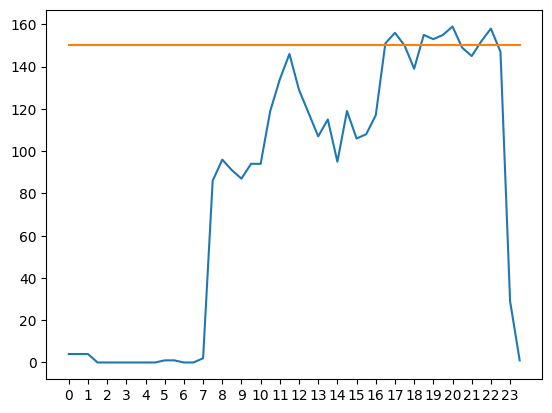

In [6]:
plt.plot(x, y)
plt.xticks(range(0, 24))
plt.plot([x.iloc[0], x.iloc[len(x) - 1]], [150, 150])


In [7]:
df.iloc[0]['date'] > datetime.datetime(2024, 5, 17)

False

In [8]:
weekAvg = df[["weekday", "hour", "dedicated_space.current_count"]].groupby(["weekday", "hour"]).aggregate("mean")["dedicated_space.current_count"]
weekAvg

weekday  hour
0        0.0      1.764706
         0.5      1.764706
         1.0      1.764706
         1.5      0.176471
         2.0      0.294118
                   ...    
6        21.5    94.823529
         22.0    90.647059
         22.5    64.764706
         23.0    11.176471
         23.5     1.764706
Name: dedicated_space.current_count, Length: 336, dtype: float64

(0.0, 180.0)

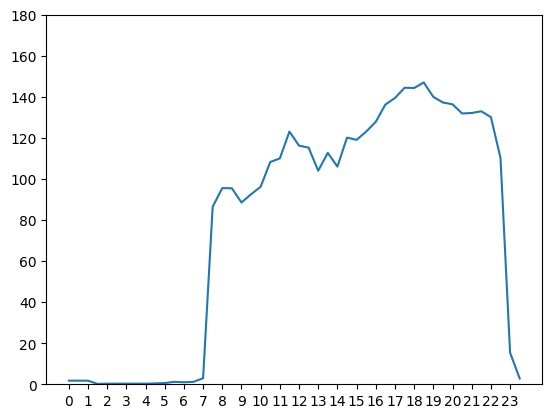

In [9]:
plt.plot(weekAvg[0])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

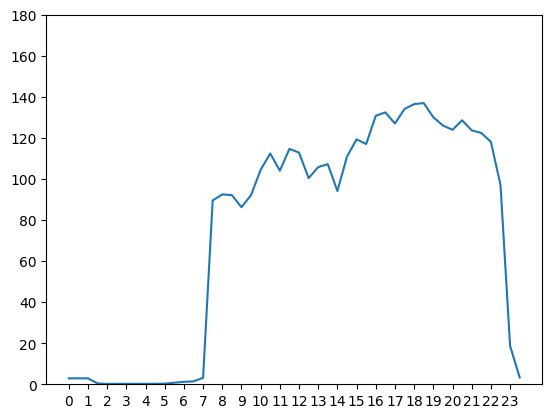

In [10]:
plt.plot(weekAvg[1])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

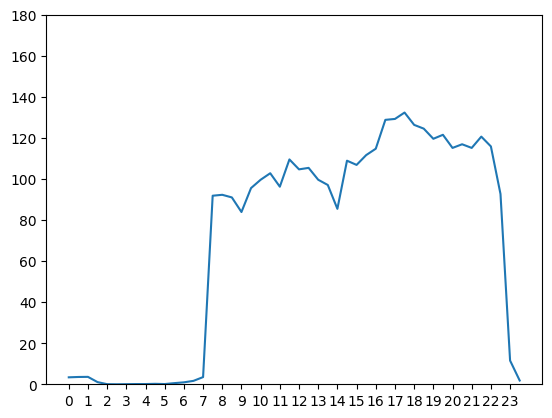

In [11]:
plt.plot(weekAvg[2])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

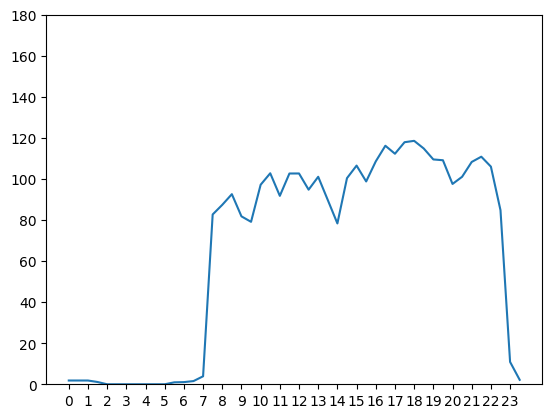

In [12]:
plt.plot(weekAvg[3])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

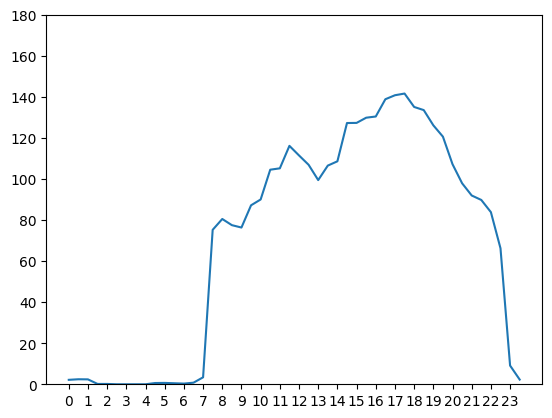

In [13]:
plt.plot(weekAvg[4])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

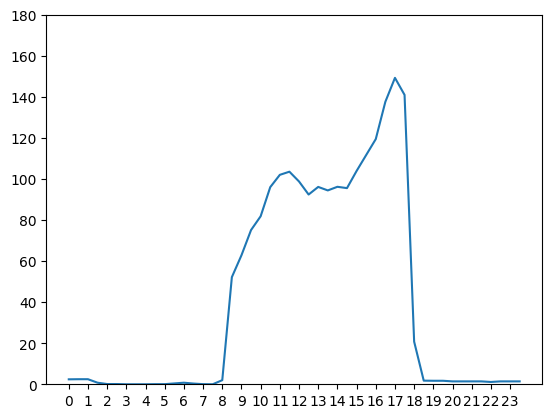

In [14]:
plt.plot(weekAvg[5])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(0.0, 180.0)

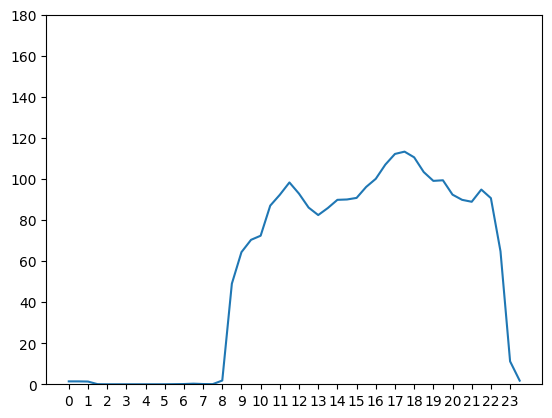

In [15]:
plt.plot(weekAvg[6])
plt.xticks(range(0, 24));
plt.ylim(0, 180)

(<matplotlib.image.AxesImage at 0x23e9a0b7dd0>,
 <matplotlib.colorbar.Colorbar at 0x23e9a0f6450>)

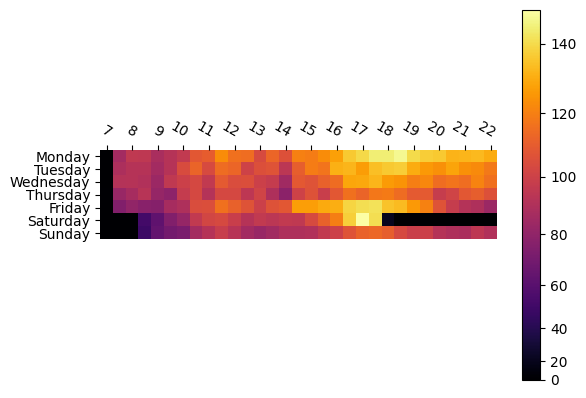

In [59]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(0, data.shape[1], 2), labels=col_labels)
    ax.set_yticks(np.arange(0, data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    #ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    #ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

weekAvgArray = []
for i in range(0, 48 * 7, 48):
    weekAvgArray.append(weekAvg.values[i + 14 : i + 45])
weekAvgArray = np.array(weekAvgArray)

heatmap(weekAvgArray, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], np.linspace(7, 22, 16).astype(int), cmap="inferno", norm=matplotlib.colors.PowerNorm(1.5))

In [42]:
capacityDays = (df["dedicated_space.current_count"] > 100).groupby(df["date"].dt.date).aggregate(['sum']).astype("int")
capacityDays.index = pd.to_datetime(capacityDays.index)

capacityDays

,sum
date,
2023-08-22,13
2023-08-23,30
2023-08-24,29
2023-08-25,29
2023-08-26,19
...,...
2023-12-18,0
2023-12-19,0
2023-12-20,0


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


2023-01-01   NaN
2023-01-02   NaN
2023-01-03   NaN
2023-01-04   NaN
2023-01-05   NaN
              ..
2023-12-27   NaN
2023-12-28   NaN
2023-12-29   NaN
2023-12-30   NaN
2023-12-31   NaN
Freq: D, Name: sum, Length: 365, dtype: float64


(<Figure size 1000x200 with 2 Axes>,
 array([<Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


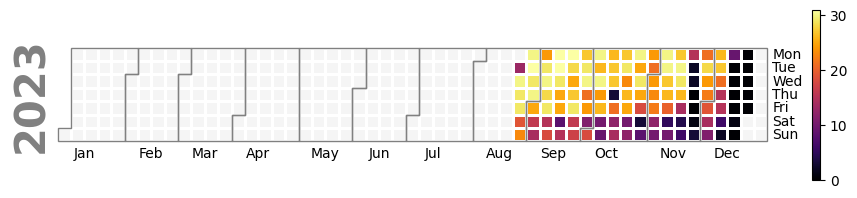

In [56]:
calplot.calplot(capacityDays["sum"], figsize=[10, 2], dropzero=False, cmap="inferno")

In [44]:
capacityDays.index

DatetimeIndex(['2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29',
               '2023-08-30', '2023-08-31',
               ...
               '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-16',
               '2023-12-17', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22'],
              dtype='datetime64[ns]', name='date', length=123, freq=None)